In [3]:
# !pip install pandas
# !pip install -U scikit-learn==1.3.2
# !pip install umap-learn
# !pip install pacmap
# !pip install matplotlib
# !pip install seaborn

# !pip list | grep pacmap
# !pip list | grep pandas
# !pip list | grep umap

In [1]:
import os
import pandas as pd
os.getcwd()

'/home/cristiano/ufpr/tcc'

In [4]:
# run on colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
base_path = '/home/cristiano/ufpr/tcc/data/'

In [3]:
df_microdados = pd.read_csv(f'{base_path}/MICRODADOS_ENEM_2022.csv', sep=';', encoding='ISO-8859-1')
# df_itens_prova = pd.read_csv(f'{base_path}/ITENS_PROVA_2022.csv', sep=';', encoding='ISO-8859-1')
# df_quest_hab = pd.read_csv(f'{base_path}/QUEST_HAB_ESTUDO.csv', sep=';', encoding='ISO-8859-1')

In [6]:
# df_microdados = df_microdados_original.copy()

In [4]:
df_microdados.shape

(3476105, 76)

In [5]:
import pandas as pd

# cntagem de valores nulos por coluna
valores_nulos_por_coluna = df_microdados.isnull().sum()

# Filtrar apenas as colunas com valores nulos
colunas_com_valores_nulos = valores_nulos_por_coluna[valores_nulos_por_coluna > 0]

# Exibindo os resultados
print(colunas_com_valores_nulos)

TP_ENSINO                 2213361
CO_MUNICIPIO_ESC          2524161
NO_MUNICIPIO_ESC          2524161
CO_UF_ESC                 2524161
SG_UF_ESC                 2524161
TP_DEPENDENCIA_ADM_ESC    2524161
TP_LOCALIZACAO_ESC        2524161
TP_SIT_FUNC_ESC           2524161
CO_PROVA_CN               1120710
CO_PROVA_CH                982663
CO_PROVA_LC                982663
CO_PROVA_MT               1120710
NU_NOTA_CN                1120710
NU_NOTA_CH                 982663
NU_NOTA_LC                 982663
NU_NOTA_MT                1120710
TX_RESPOSTAS_CN           1120710
TX_RESPOSTAS_CH            982663
TX_RESPOSTAS_LC            982663
TX_RESPOSTAS_MT           1120710
TX_GABARITO_CN            1120710
TX_GABARITO_CH             982663
TX_GABARITO_LC             982663
TX_GABARITO_MT            1120710
TP_STATUS_REDACAO          982663
NU_NOTA_COMP1              982663
NU_NOTA_COMP2              982663
NU_NOTA_COMP3              982663
NU_NOTA_COMP4              982663
NU_NOTA_COMP5 

In [6]:
df_microdados.head(2)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B


In [10]:
# print(f'dimensão microdados: {df_microdados.shape}\ndimensão itens prova{df_itens_prova.shape}\ndimensão quest hab {df_quest_hab.shape}')

In [7]:
df_microdados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

Colunas
- NU_INSCRICAO: id
- NU_ANO -> remover
- TP_FAIXA_ETARIA: faixa etária(1 a 20)
- TP_SEXO -> M OU F
- TP_ESTADO_CIVIL: 0 A 4
- TP_COR_RACA: 0 A 6
- TP_NACIONALIDADE: 0 A 4
- TP_ST_CONCLUSAO: status conclusão ensino medio(1 a 4)
- TP_ANO_CONCLUIU: 0 A 16
- TP_ESCOLA: 1 a 3(possível target)
- TP_ENSINO: 1 OU 2
- IN_TREINEIRO: 1 OU 0
- CO_MUNICIPIO_ESC: codigo municipio escola
- NO_MUNICIPIO_ESC: Nome
- CO_UF_ESC: codigo da unidade da federação da escola
- SG_UF_ESC: sigla uf da escola
- TP_DEPENDENCIA_ADM_ESCOLA: 1 a 4
- TP_LOCALIZACAO_ESC: 1 ou 2(urbana ou rural)
- TP_SIT_FUNC_ESC: situacao de funcionamento(1 a 4)
- CO_MUNICIPIO_PROVA: código da cidade onde a prova foi aplicada
- NO_MUNICIPIO_PROVA: nome
- CO_UF_PROVA: codigo uf
- SG_UF_PROVA: sigla da uf
- TP_PRESENCA_CN
- TP_PRESENCA_CH
- TP_PRESENCA_LC
- TP_PRESENCA_MT: 0 A 2
- CO_PROVA_CN
- CO_PROVA_CH
- CO_PROVA_LC
- CO_PROVA_MT: código das provas(já é numérico)
- NU_NOTA_CN
- NU_NOTA_CH
- NU_NOTA_LC
- NU_NOTA_MT: notas(númerica)  
- TX_RESPOSTAS_CN
- TX_RESPOSTAS_CH
- TX_RESPOSTAS_LC
- TX_RESPOSTAS_MT: vetores com as respostas(não usar)

- TP_LINGUA: ingles ou espanhol(0 ou 1)

- TX_GABARITO_CN
- TX_GABARITO_CH
- TX_GABARITO_LC
- TX_GABARITO_MT: vetores com o gabarito(não usar)

- TP_STATUS_REDACAO: status redação(1 a 9)

- NU_NOTA_COMP1
- NU_NOTA_COMP2
- NU_NOTA_COMP3
- NU_NOTA_COMP4
- NU_NOTA_COMP5: notas de competências da redação

- NU_NOTA_REDACAO: nota redaçao

- questões socieconômicas: alternativas alfanuméricas
##### target inicial -> Q006

In [8]:
df_microdados.shape

(3476105, 76)

In [9]:
descartar = [
    'NU_INSCRICAO', 
    'NU_ANO', 
    'TX_RESPOSTAS_CN', 
    'TX_RESPOSTAS_CH', 
    'TX_RESPOSTAS_LC',
    'TX_RESPOSTAS_MT',
    'TX_GABARITO_CN', 
    'TX_GABARITO_CH',
    'TX_GABARITO_LC', 
    'TX_GABARITO_MT', 
    'TP_ENSINO',              
    'CO_MUNICIPIO_ESC',       
    'NO_MUNICIPIO_ESC',       
    'CO_UF_ESC',              
    'SG_UF_ESC',              
    'TP_DEPENDENCIA_ADM_ESC', 
    'TP_LOCALIZACAO_ESC',     
    'TP_SIT_FUNC_ESC',        
    'CO_PROVA_CN',            
    'CO_PROVA_CH',            
    'CO_PROVA_LC',            
    'CO_PROVA_MT'
]


In [10]:
zerar_colunas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "TP_STATUS_REDACAO"]

In [11]:
df_microdados = df_microdados.drop(columns=descartar)

In [12]:
df_microdados[zerar_colunas] = df_microdados[zerar_colunas].fillna(0)

In [19]:
# df_exlui = df_microdados.dropna()
# df_microdados.shape[0] == df_exlui.shape[0]

In [20]:
# proporção de dados que contém algum dado nulo (ANTIGO)
# 681900 / 3476105

In [13]:
df_microdados.shape

(3476105, 54)

In [14]:
df_microdados.reset_index(drop=True, inplace=True)

In [15]:
df_microdados.rename(columns={'Q006': 'faixa_renda_familiar'}, inplace=True)

In [19]:
# !pip install pyarrow

In [20]:
# df_microdados.to_parquet('./data/data_prepared_enem_2022.parquet')

#### UTILZAR DADOS JÁ PREPARADOS

In [22]:
df_microdados = pd.read_parquet('./data/data_prepared_enem_2022.parquet')

In [ ]:
df_microdados['TP_ESCOLA'].value_counts()

### muitos dados não informados -> não considerar esses registros

In [17]:
from sklearn.model_selection import train_test_split

X = df_microdados.drop('faixa_renda_familiar', axis=1)
y = df_microdados['faixa_renda_familiar']

In [18]:
# X.columns.to_list()

In [19]:
del df_microdados

In [20]:
numeric_cols = [
    "TP_FAIXA_ETARIA",
    "TP_ESTADO_CIVIL",
    "TP_COR_RACA",
    "TP_NACIONALIDADE",
    "TP_ST_CONCLUSAO",
    "TP_ANO_CONCLUIU",
    "TP_ESCOLA",
    "IN_TREINEIRO",
    "CO_MUNICIPIO_PROVA",
    "CO_UF_PROVA",
    "TP_PRESENCA_CN",
    "TP_PRESENCA_CH",
    "TP_PRESENCA_LC",
    "TP_PRESENCA_MT",
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "TP_LINGUA",
    "NU_NOTA_REDACAO",
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    "Q005"
]

categorical_cols = [
    "TP_SEXO",
    "Q001",
    "Q002",
    "Q003",
    "Q004",
    "Q007",
    "Q008",
    "Q009",
    "Q010",
    "Q011",
    "Q012",
    "Q013",
    "Q014",
    "Q015",
    "Q016",
    "Q017",
    "Q018",
    "Q019",
    "Q020",
    "Q021",
    "Q022",
    "Q023",
    "Q024",
    "Q025",
    "NO_MUNICIPIO_PROVA",
    "TP_STATUS_REDACAO",
    "SG_UF_PROVA"
]


In [21]:
len(numeric_cols + categorical_cols)

53

In [22]:
set(list(X.columns)) - set(numeric_cols + categorical_cols)

set()

In [23]:
# all_columns = X.columns.to_list()

In [24]:
X.shape

(3476105, 53)

In [25]:
y.isnull().sum()

0

In [26]:
X.shape

(3476105, 53)

### Pré-processamento dos dados

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(2780884, 53)

In [31]:
y_train = pd.DataFrame(y_train)
y_train.to_parquet('/home/cristiano/ufpr/tcc/classificacao_multiclasse/y_train.parquet')

In [32]:
y_test = pd.DataFrame(y_test)
y_test.to_parquet('/home/cristiano/ufpr/tcc/classificacao_multiclasse/y_test.parquet')

In [17]:
# X_train.to_parquet('./use_data/X_train.parquet')

In [112]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, KernelPCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pacmap


def generate_pipeline(method, n_components=None):
    numeric_transformer = Pipeline(steps=[
        ('scaler', MinMaxScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('encoder', OrdinalEncoder())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols),
        ])

    if method == 'nan':
        return Pipeline(steps=[
            ('preprocessor', preprocessor)
        ])

    elif method == 'pca':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('reduction_method', PCA(n_components=n_components))
        ])

    elif method == 'svd':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('reduction_method', TruncatedSVD(n_components=n_components))
        ])

    elif method == 'ica':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('reduction_method', FastICA(n_components=n_components))
        ])

    ### não será utilizado pois não é eficiente para um conjunto de dados com muitas linhas como é o nosso caso, no algoritmo do kpca a dimensionalidade é aumentada
    ### e nesse caso como temos mais de 3 milhões de linhas, o algoritmo não é eficiente
    
    elif method == 'kernel_pca':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('reduction_method', KernelPCA(n_components=n_components, kernel='rbf', gamma=10, alpha=0.1))
        ])

    elif method == 'tsne':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('pre_tsne', PCA(n_components=5)),
            ('reduction_method', TSNE(n_components=n_components, random_state=42))
        ])

    elif method == 'umap':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('reduction_method', UMAP(n_components=n_components, random_state=42))
        ])
        
    elif method == 'pacmap':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('reduction_method', pacmap.PaCMAP(n_components=n_components, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0, random_state=42))
        ])

#### Resultados Redução de dimensionalidade

In [33]:
##### Não será mais utilizado, visto que faz sentido apenas para métodos como PCA e SVD

import numpy as np
def get_preserved_variance_ratio(X, X_transformed):
    # Calcula a variância total dos dados originais
    total_variance = np.var(X, axis=0).sum()

    # Calcula a variância após a redução de dimensionalidade
    reduced_variance = np.var(X_transformed, axis=0).sum()

    # Calcula a proporção da variância preservada
    preserved_variance_ratio = reduced_variance / total_variance

    return preserved_variance_ratio

### faz sentido aplicar para todos os métodos de redução de dimensionalidade?

In [111]:
from sklearn.metrics.pairwise import euclidean_distances

def get_preserved_proximity(X, X_transformed):
    # Calcular as distâncias euclidianas nos espaços original e reduzido
    dist_original = euclidean_distances(X)
    dist_tsne = euclidean_distances(X_transformed)

    # Calcular a preservação da estrutura de proximidade
    preservation = np.abs(dist_original - dist_tsne).mean()

    return preservation

In [34]:
import pandas as pd
import gc
import time

def get_linear_methods_results(list_methods, n_components_list, X_train):
    results = []

    for method in list_methods:
        for n in n_components_list:
            print(f"Method: {method} - n_components: {n}")
            # dr is short for dimensionality reduction
            pipeline_dr = generate_pipeline(method, n)
            pipeline_without_dr = generate_pipeline('nan')

            start_time = time.time()
            
            X_train_transformed_dr = pipeline_dr.fit_transform(X_train)

            end_time = time.time()
            execution_time = end_time - start_time

            print(f"Execution time: {execution_time} seconds")

            X_train_transformed = pipeline_without_dr.fit_transform(X_train)

            X_restored = pipeline_dr.named_steps['reduction_method'].inverse_transform(X_train_transformed_dr)

            reduction_method_mse = mean_squared_error(X_train_transformed, X_restored)

            # save X_train_transformed_dr as parquet
            X_train_transformed_dr_df = pd.DataFrame(X_train_transformed_dr)

            results.append({
                'Method': method,
                'n_components': n,
                'MSE': reduction_method_mse,
                'time': execution_time
            })

            del pipeline_dr
            del pipeline_without_dr
            del X_train_transformed_dr
            del X_train_transformed
            del X_restored
            gc.collect()

    # Convertendo a lista de dicionários em um DataFrame
    results_df = pd.DataFrame(results)

    return results_df

In [114]:
def get_non_linear_methods_results(list_methods, n_components_list, X_train):
    results = []

    for method in list_methods:
        for n in n_components_list:
            print(f"Method: {method} - n_components: {n}")
            # dr is short for dimensionality reduction
            pipeline_dr = generate_pipeline(method, n)
            pipeline_without_dr = generate_pipeline('nan')

            start_time = time.time()
            
            X_train_transformed_dr = pipeline_dr.fit_transform(X_train)

            end_time = time.time()
            execution_time = end_time - start_time

            print(f"Execution time: {execution_time} seconds")

            X_train_transformed = pipeline_without_dr.fit_transform(X_train)

            # save X_train_transformed_dr as parquet
            X_train_transformed_dr_df = pd.DataFrame(X_train_transformed_dr)
            
            preservation = get_preserved_proximity(X_train_transformed, X_train_transformed_dr)

            results.append({
                'Method': method,
                'n_components': n,
                'preserved_proximity': preservation,
                'time': execution_time
            })

            del pipeline_dr
            del pipeline_without_dr
            del X_train_transformed_dr
            del X_train_transformed

            gc.collect()

    # Convertendo a lista de dicionários em um DataFrame
    results_df = pd.DataFrame(results)

    return results_df

In [39]:
list_linear_methods = ["pca", "svd", "ica"]
n_components_list = [2, 3, 5, 10, 20, 30]

In [35]:
import pandas as pd

df = pd.read_parquet('/home/cristiano/ufpr/results/linear_metrics.parquet')

In [36]:
df.head(3)

,Method,n_components,Preserved Variance Ratio,MSE,time
0,pca,2,0.999915,0.394427,18.659232
1,pca,3,0.999945,0.254804,18.818518
2,pca,5,0.999962,0.175547,19.849131


In [37]:
gc.collect()

48313

In [ ]:
df_results_linear_methods = get_linear_methods_results(list_linear_methods, n_components_list, X_train)

In [22]:
non_linear_methods = ["umap"]
n_components_list = [2]

df_results_non_linear_methods_umap = get_dimension_reduction_results(non_linear_methods, n_components_list, X_train)

Method: umap - n_components: 2


### Análise de métricas redução de dimensionalidade

In [38]:
import pandas as pd

df_linear_results = pd.read_parquet('/home/cristiano/ufpr/results/linear_metrics.parquet')

In [39]:
df_linear_results.head(3)

,Method,n_components,Preserved Variance Ratio,MSE,time
0,pca,2,0.999915,0.394427,18.659232
1,pca,3,0.999945,0.254804,18.818518
2,pca,5,0.999962,0.175547,19.849131


#### Análise Métodos lineares

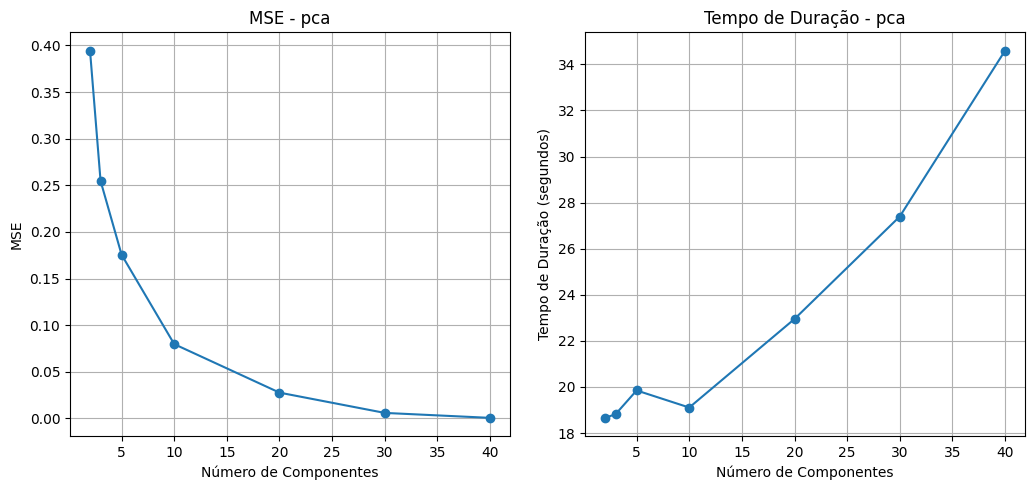

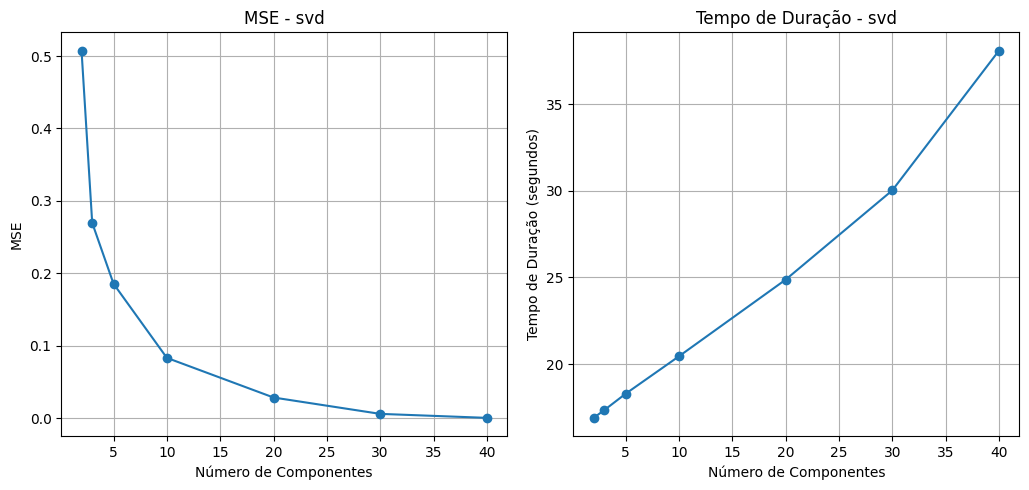

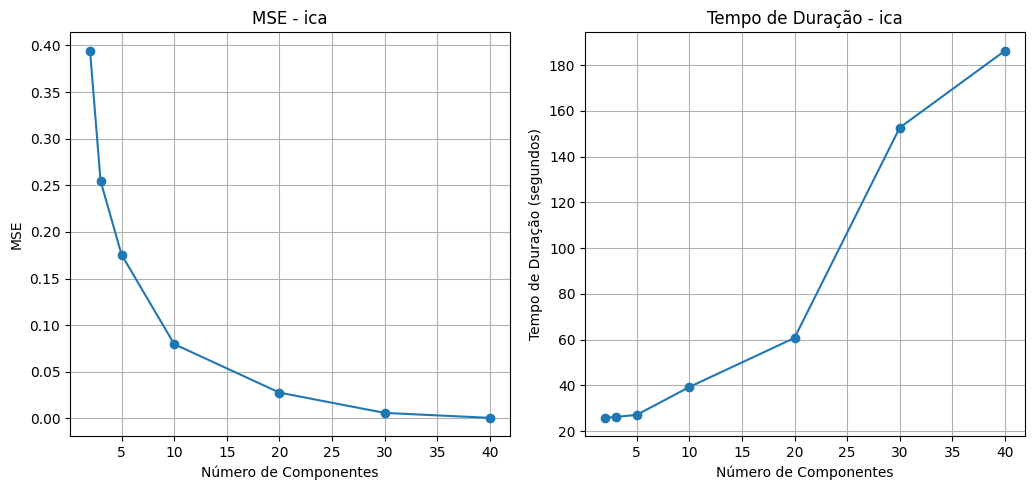

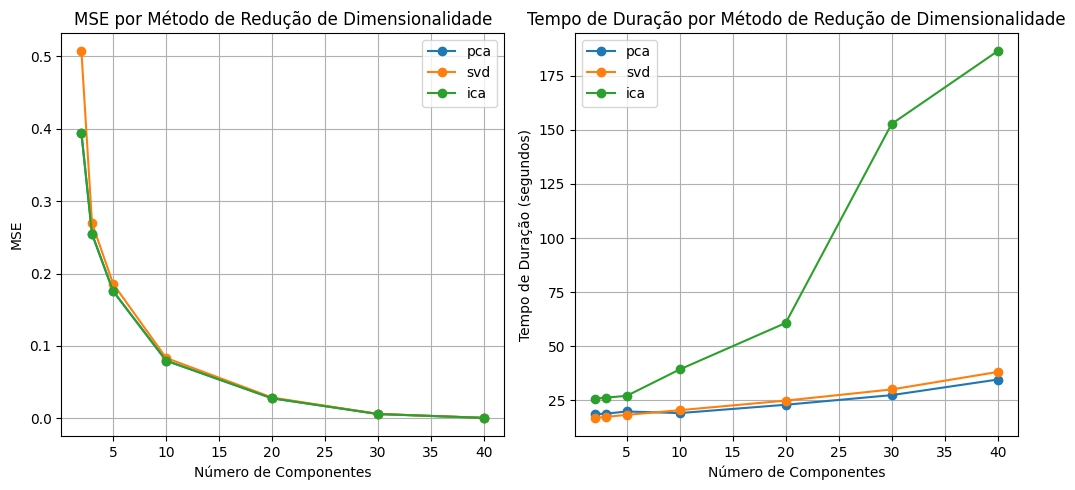

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

metodos = df_linear_results['Method'].unique()
n_componentes = df_linear_results['n_components']
variancia_preservada = df_linear_results['Preserved Variance Ratio']

mse = df_linear_results['MSE']
tempo_duracao = df_linear_results['time']

# Plotando gráficos de linhas individuais para cada método e métrica
for metodo in metodos:
    plt.figure(figsize=(15, 5))

    # Gráfico de Linhas para MSE
    plt.subplot(1, 3, 2)
    plt.plot(n_componentes[df_linear_results['Method'] == metodo], 
             mse[df_linear_results['Method'] == metodo], 
             marker='o')
    plt.title(f'MSE - {metodo}')
    plt.xlabel('Número de Componentes')
    plt.ylabel('MSE')
    plt.grid(True)

    # Gráfico de Linhas para Tempo de Duração
    plt.subplot(1, 3, 3)
    plt.plot(n_componentes[df_linear_results['Method'] == metodo], 
             tempo_duracao[df_linear_results['Method'] == metodo], 
             marker='o')
    plt.title(f'Tempo de Duração - {metodo}')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Tempo de Duração (segundos)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plotando gráficos comparativos para cada métrica
plt.figure(figsize=(15, 5))

# Gráfico de Linhas para MSE
plt.subplot(1, 3, 2)
for metodo in metodos:
    plt.plot(n_componentes[df_linear_results['Method'] == metodo], 
             mse[df_linear_results['Method'] == metodo], 
             marker='o', label=metodo)
plt.title('MSE por Método de Redução de Dimensionalidade')
plt.xlabel('Número de Componentes')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# Gráfico de Linhas para Tempo de Duração
plt.subplot(1, 3, 3)
for metodo in metodos:
    plt.plot(n_componentes[df_linear_results['Method'] == metodo], 
             tempo_duracao[df_linear_results['Method'] == metodo], 
             marker='o', label=metodo)
plt.title('Tempo de Duração por Método de Redução de Dimensionalidade')
plt.xlabel('Número de Componentes')
plt.ylabel('Tempo de Duração (segundos)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Visualização dos Dados após redução de dimensionalidade

In [49]:
categorical_transformer = Pipeline(steps=[
        ('encoder', OrdinalEncoder())
    ])

In [53]:
df = pd.DataFrame(y_train)

In [57]:
df

,faixa_renda_familiar
1270751,C
2083910,B
629683,C
1978521,C
1902193,D
...,...
1692743,B
2356330,E
2229084,C
2768307,C


In [58]:
y_transformed = categorical_transformer.fit_transform(df)

In [106]:
def plot_dimensionality_reduction(x, method_name):

    
    plt.hexbin(x[0], x[1], gridsize=30, cmap='viridis')
    plt.colorbar()
    plt.title(f'Hexbin Scatter Plot - {method_name}')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.tight_layout()
    plt.show()

In [100]:
path = "/home/cristiano/ufpr/results/"

In [101]:
data_pca = pd.read_parquet(f'{path}/X_train_transformed_dr_pca_2.parquet')
data_svd = pd.read_parquet(f'{path}/X_train_transformed_dr_svd_2.parquet')
data_ica = pd.read_parquet(f'{path}/X_train_transformed_dr_ica_2.parquet')

data_tsne = pd.read_parquet(f'{path}/X_train_transformed_dr_tsne_2.parquet')

In [102]:
data_pca

,0,1
0,643.244106,6.739455
1,648.229814,-0.169020
2,-506.761894,5.047724
3,446.230320,0.266698
4,-640.792598,-9.623863
...,...,...
2780879,572.221760,-4.011883
2780880,-428.778751,-3.131160
2780881,-814.773404,-0.189945
2780882,-535.745367,13.114441


data_pca

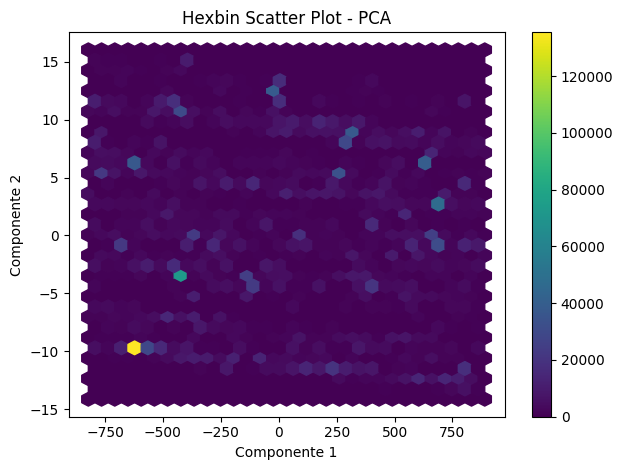

In [107]:
plot_dimensionality_reduction(data_pca, 'PCA')

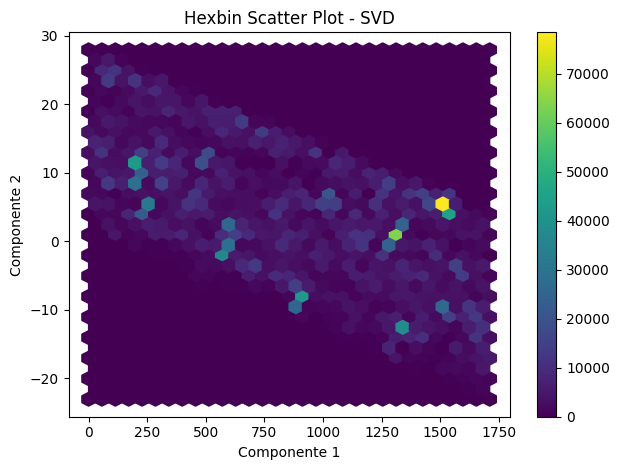

In [108]:
plot_dimensionality_reduction(data_svd, 'SVD')

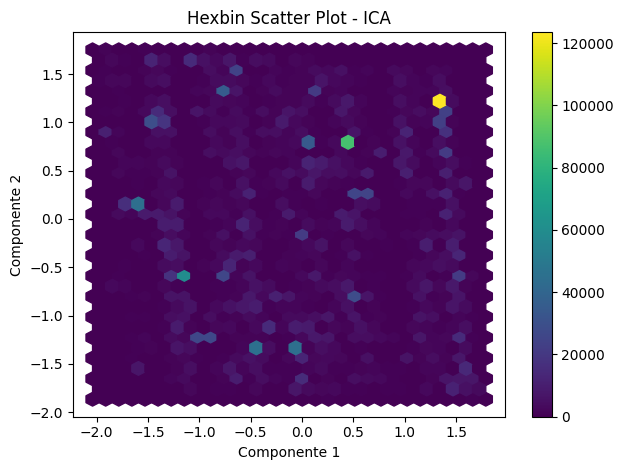

In [109]:
plot_dimensionality_reduction(data_ica, 'ICA')

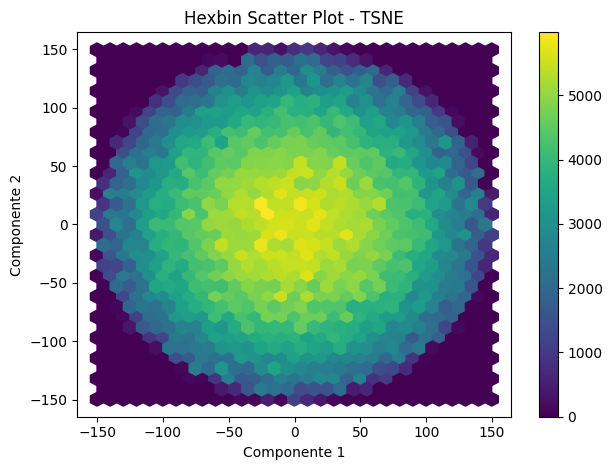

In [110]:
plot_dimensionality_reduction(data_tsne, 'TSNE')

#### Classificação Multiclasse

##### Train Baseline Model

In [7]:
# !pip install xgboost

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
import xgboost as xgb

In [3]:
data_enem = pd.read_parquet("/home/cristiano/ufpr/tcc/data/data_prepared_enem_2022.parquet")

In [5]:
from sklearn.model_selection import train_test_split

X = data_enem.drop('faixa_renda_familiar', axis=1)
y = data_enem['faixa_renda_familiar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.to_parquet('/home/cristiano/ufpr/tcc/train_data/multiclasse/X_train.parquet')

In [4]:
numeric_cols = [
    "TP_FAIXA_ETARIA",
    "TP_ESTADO_CIVIL",
    "TP_COR_RACA",
    "TP_NACIONALIDADE",
    "TP_ST_CONCLUSAO",
    "TP_ANO_CONCLUIU",
    "TP_ESCOLA",
    "IN_TREINEIRO",
    "CO_MUNICIPIO_PROVA",
    "CO_UF_PROVA",
    "TP_PRESENCA_CN",
    "TP_PRESENCA_CH",
    "TP_PRESENCA_LC",
    "TP_PRESENCA_MT",
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "TP_LINGUA",
    "NU_NOTA_REDACAO",
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    "Q005"
]

In [5]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Suponha que você tenha seus datasets X_train e y_train

# Lista de colunas categóricas
categorical_cols = [
    "TP_SEXO",
    "Q001",
    "Q002",
    "Q003",
    "Q004",
    "Q007",
    "Q008",
    "Q009",
    "Q010",
    "Q011",
    "Q012",
    "Q013",
    "Q014",
    "Q015",
    "Q016",
    "Q017",
    "Q018",
    "Q019",
    "Q020",
    "Q021",
    "Q022",
    "Q023",
    "Q024",
    "Q025",
    "NO_MUNICIPIO_PROVA",
    "TP_STATUS_REDACAO",
    "SG_UF_PROVA"
]

# Pipeline para aplicar codificadores
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal_encoder', OrdinalEncoder(), categorical_cols)
    ]
)

# Crie o pipeline
train_pipeline = Pipeline(steps=[    
    ('preprocessor', preprocessor)
])

# Ajuste o pipeline ao conjunto de dados de treinamento
X_train_encoded = train_pipeline.fit_transform(X_train)

# Use LabelEncoder para codificar o alvo
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


In [6]:
X_test_transformed = train_pipeline.transform(X_test)
y_test_transformed = label_encoder.transform(y_test)

In [12]:
from xgboost import XGBClassifier

model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      n_estimators=600, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

In [13]:
# Treine o modelo com o conjunto de treinamento e valide-o com o conjunto de validação
xgb_classifier = model.fit(X_train_encoded, y_train_encoded)

/home/cristiano/envs/tcc/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:13:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [10]:
y_predicted = xgb_classifier.predict(X_test_transformed)


In [21]:
# y_test = y_test['coluna'].to_numpy()

In [11]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Y_true são as classes reais, Y_pred são as previsões do modelo
accuracy = accuracy_score(y_test_transformed, y_predicted)

print("Acurácia:", accuracy)

Acurácia: 0.3490458429765499


#### Prepare data for binary classification

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [2]:
data_enem = pd.read_parquet("/home/cristiano/ufpr/tcc/data/data_prepared_enem_2022.parquet")

In [7]:
cols = list(data_enem.columns)

In [9]:
len(cols)

54

In [3]:
data_enem_binary_classifier = data_enem.loc[data_enem["TP_ESCOLA"] != 1]

In [4]:
data_enem_binary_classifier.shape

(1317560, 54)

In [12]:
from sklearn.model_selection import train_test_split

X = data_enem_binary_classifier.drop('TP_ESCOLA', axis=1)
y = data_enem_binary_classifier['TP_ESCOLA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
NUMERIC_COLS = [
    "TP_FAIXA_ETARIA",
    "TP_ESTADO_CIVIL",
    "TP_COR_RACA",
    "TP_NACIONALIDADE",
    "TP_ST_CONCLUSAO",
    "TP_ANO_CONCLUIU",
    "IN_TREINEIRO",
    "CO_MUNICIPIO_PROVA",
    "CO_UF_PROVA",
    "TP_PRESENCA_CN",
    "TP_PRESENCA_CH",
    "TP_PRESENCA_LC",
    "TP_PRESENCA_MT",
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "TP_LINGUA",
    "NU_NOTA_REDACAO",
    "NU_NOTA_COMP1",
    "NU_NOTA_COMP2",
    "NU_NOTA_COMP3",
    "NU_NOTA_COMP4",
    "NU_NOTA_COMP5",
    "Q005",
    "Q001",
    "Q002",
    "Q003",
    "Q004",
    "Q007",
    "Q008",
    "Q009",
    "Q010",
    "Q011",
    "Q012",
    "Q013",
    "Q014",
    "Q015",
    "Q016",
    "Q017",
    "Q018",
    "Q019",
    "Q020",
    "Q021",
    "Q022",
    "Q023",
    "Q024",
    "Q025",
    "NO_MUNICIPIO_PROVA"
]

CATEGORICAL_COLS = [
    "TP_SEXO",
    "Q001",
    "Q002",
    "Q003",
    "Q004",
    "Q007",
    "Q008",
    "Q009",
    "Q010",
    "Q011",
    "Q012",
    "Q013",
    "Q014",
    "Q015",
    "Q016",
    "Q017",
    "Q018",
    "Q019",
    "Q020",
    "Q021",
    "Q022",
    "Q023",
    "Q024",
    "Q025",
    "NO_MUNICIPIO_PROVA",
    "TP_STATUS_REDACAO",
    "SG_UF_PROVA",
]


In [32]:
numeric_transformer = Pipeline(steps=[("scaler", MinMaxScaler())])

categorical_transformer = Pipeline(steps=[("encoder", OrdinalEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, CATEGORICAL_COLS),
        ("num", numeric_transformer, NUMERIC_COLS),
    ]
)

In [30]:
x_transformed[0]

array([1.00000000e+00, 3.00000000e+00, 1.00000000e+00, 2.00000000e+00,
       2.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       3.49000000e+02, 1.00000000e+00, 4.00000000e+00, 1.05263158e-01,
       2.50000000e-01, 4.00000000e-01, 2.50000000e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.30194760e-01, 4.28571429e-01,
       5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
       4.85090826e-01, 5.45042898e-01, 6.20599251e-01, 3.80135944e-01,
       1.00000000e+00, 6.00000000e-01, 5.00000000e-01, 9.00000000e-01,
       5.00000000e-01, 6.00000000e-01, 5.00000000e-01])

In [6]:
X_train.to_parquet('/home/cristiano/ufpr/tcc/train_data/binaria/X_train.parquet')

In [9]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Suponha que você tenha seus datasets X_train e y_train

# Lista de colunas categóricas
categorical_cols = [
    "TP_SEXO",
    "Q001",
    "Q002",
    "Q003",
    "Q004",
    "Q007",
    "Q008",
    "Q009",
    "Q010",
    "Q011",
    "Q012",
    "Q013",
    "Q014",
    "Q015",
    "Q016",
    "Q017",
    "Q018",
    "Q019",
    "Q020",
    "Q021",
    "Q022",
    "Q023",
    "Q024",
    "Q025",
    "NO_MUNICIPIO_PROVA",
    "TP_STATUS_REDACAO",
    "SG_UF_PROVA"
]

# Pipeline para aplicar codificadores
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal_encoder', OrdinalEncoder(), categorical_cols)
    ]
)

# Crie o pipeline
train_pipeline = Pipeline(steps=[    
    ('preprocessor', preprocessor)
])

# Ajuste o pipeline ao conjunto de dados de treinamento
X_train_encoded = train_pipeline.fit_transform(X_train)

# Use LabelEncoder para codificar o alvo
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [10]:
y_train_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
from xgboost import XGBClassifier

model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      n_estimators=100, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

In [12]:
xgb_classifier = model.fit(X_train_encoded, y_train_encoded)

/home/cristiano/envs/tcc/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:35:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [13]:
X_test_transformed = train_pipeline.transform(X_test)
y_test_transformed = label_encoder.transform(y_test)

In [14]:
y_predicted = xgb_classifier.predict(X_test_transformed)

In [15]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Y_true são as classes reais, Y_pred são as previsões do modelo
accuracy = accuracy_score(y_test_transformed, y_predicted)

print("Acurácia:", accuracy)

Acurácia: 0.8672394426060294
